# HW8 total 8 points
# Feature engineering and NA handling

Before we build any classification model, we need to understand the dataset, It'll help in relevant features creation and proper handling of missing values.

In this homework we will see how to create new features and measure association(like correlation between numerical variable) between two categorical variables. There are more columns for feature engineering but we'll focus on name column and filling missing values in other columns.

To illustrates the concept, we will use titanic dataset. This is a well explored dataset but provides a lot of opportunity for feature engineering. Task is predicting the survival of a passenger, but we will not build model in this homework.


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
%matplotlib inline
sns.set(style="darkgrid")

In [24]:

titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- As you can see a lot of people don't have a cabin(687/891). We can't drop record based on cabin. We'll encode not having a cabin as character **O**

# Q1 (.5 points) fill NAN in cabin with Character 'O'

In [26]:
#Write code here
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('O')


In [27]:
titanic_df.Cabin.head(15)

0        O
1      C85
2        O
3     C123
4        O
5        O
6      E46
7        O
8        O
9        O
10      G6
11    C103
12       O
13       O
14       O
Name: Cabin, dtype: object

If we one hot encode above cabin values and view correlation heatmap, there will be a lot of categories. Let create a new column based on cabin class first letter(C, D ,E, O etc.) .

# Q2 (.5 points) Create a new column named Cabin_type.  Use first character from Cabin field to fill value in  Cabin_type.

In [28]:
#Write code here
def createCabinType(row):
    if row['Cabin'] == 'O':
        row['Cabin_type'] = 'O'
    else:
        row['Cabin_type'] = str(row['Cabin'])[0]
        
    return row

titanic_df = titanic_df.apply(createCabinType, axis=1)

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S,O


Let's explore survival based on sex.

# Q3(.5 point) Using seaborn plot a countplot   of Sex. Use proper hue so that it highlights Survived or not.

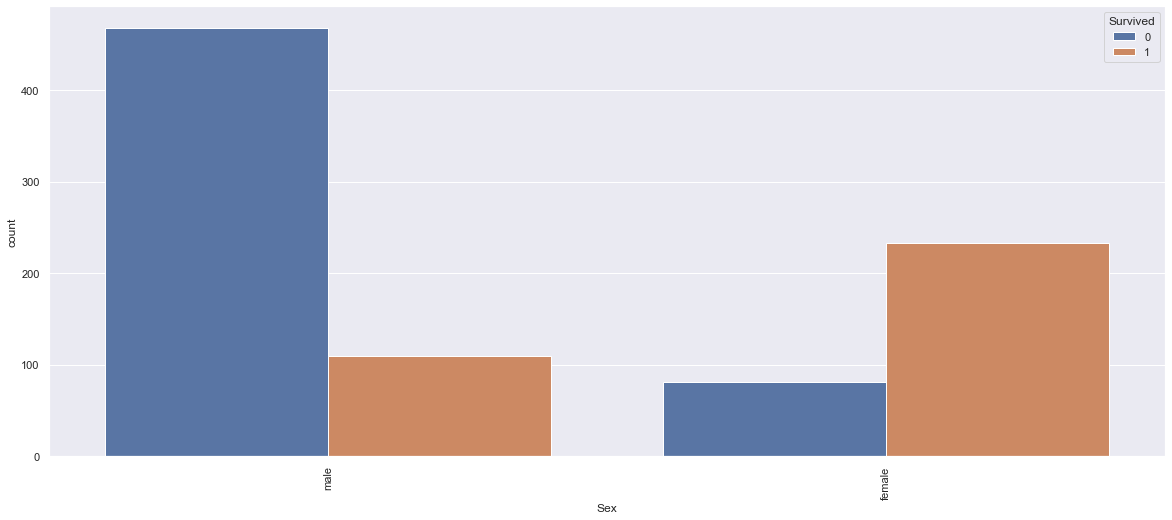

In [30]:
#Write code here
sns.set(rc={'figure.figsize':(20,8.27)})
bp = sns.countplot(x='Sex' , hue='Survived', data=titanic_df)
_ = bp.set_xticklabels(bp.get_xticklabels(),rotation = 90)


# Q4(.5) What is your observation from this plot.

Most men died.  It looks as though more men died than there were women on the ship.  And women had a much better survival rate.  Likely due to the women and children getting priority in the life boats.  

We can't use name as a feature for building any machine learning classifier(logistic regression). Let's look at Name columns and see if we can think of a better features for name.

In [31]:
titanic_df['Name'].sample(30)

389                          Lehmann, Miss. Bertha
55                               Woolner, Mr. Hugh
750                              Wells, Miss. Joan
160                       Cribb, Mr. John Hatfield
338                          Dahl, Mr. Karl Edwart
549                 Davies, Master. John Morgan Jr
340                 Navratil, Master. Edmond Roger
572               Flynn, Mr. John Irwin ("Irving")
426    Clarke, Mrs. Charles V (Ada Maria Winfield)
535                         Hart, Miss. Eva Miriam
635                              Davis, Miss. Mary
656                          Radeff, Mr. Alexander
586                        Jarvis, Mr. John Denzil
723                        Hodges, Mr. Henry Price
136                   Newsom, Miss. Helen Monypeny
697               Mullens, Miss. Katherine "Katie"
722                   Gillespie, Mr. William Henry
181                               Pernot, Mr. Rene
353                      Arnold-Franchi, Mr. Josef
482                       Rouse

# Q5.(.5 points) Can you suggest a feature based on *Name* columns 

Something that may be as useful as title is potential generational prefixes (Jr, Sr, etc..).  I see that the next part is to create a Title column, but I am curious to see what that gets us.  I think that will tell us another version of what we already know.  Women and children were had a much higher survival rate. 

# Q6(.5 points) Create a new feature named *Title* from the *Name* columns.

Hint: Here are different title

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess',
       'Jonkheer.'], dtype=object)
       
       
You can look in wikipedia see what different title meant that time.

In [32]:
titles = ['Mrs.', 'Mr.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.', 'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess', 'Jonkheer.']
def createTitle(row):
    for title in titles:
        if bool(re.search(str(title) , str(row['Name']))):
            row['Title'] = title
            break
    return row

titanic_df = titanic_df.apply(createTitle, axis=1)
titanic_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,O,C,O,Mr.
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,O,S,O,Mr.
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,C,Mrs.


# Q 7 (. 5 points) Using seaborn, plot survival based on Title. Display separate plot for male and female.

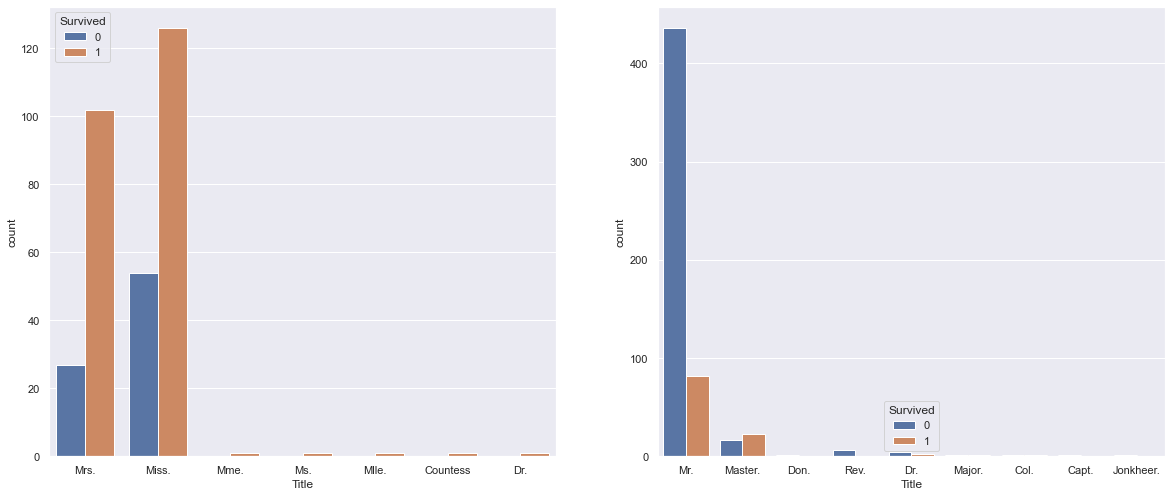

In [33]:
# Write code here
sns.set(rc={'figure.figsize':(20,8.27)})
fig, axs = plt.subplots(ncols=2)
sns.countplot(x='Title' , hue='Survived', data=titanic_df[titanic_df['Sex'] == 'female'], ax=axs[0]);
sns.countplot(x='Title' , hue='Survived', data=titanic_df[titanic_df['Sex'] == 'male'], ax=axs[1]);


# Q 8(.5 points) What is your observation from these plots

The title tells us another version of the same story.  Women and children (mostly women) survived the sinking of the Titanic.  We can observe that there may be a small inlfuence of male children (Master) that shows that men survived a little bit more than they actually did.  But just a small amount as there weren't even 100 total male children on the ship.


Let's fix Age nan issue. It has 167 nan values.

# Q9 (.5 points) Fill the Age nan value by the mean for each **Title** group.

In [34]:
# Write code here
meanAges = dict()
for title in titles:
    meanAges[title] = titanic_df.loc[titanic_df.Title == title, 'Age'].mean()
titanic_df['Age'] = titanic_df['Age'].fillna(0)

def fixAge(row):
    if row['Age'] == 0:
        row['Age'] = meanAges.get(row['Title'])
    return row

titanic_df = titanic_df.apply(fixAge, axis=1)

titanic_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,32.409774,0,0,312993,7.7750,O,S,O,Mr.
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,35.642857,1,0,PC 17604,82.1708,O,C,O,Mrs.
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.000000,0,0,29108,11.5000,O,S,O,Mr.


In [35]:
# Let's see if there are still some NAN 
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Cabin_type     0
Title          0
dtype: int64

There are two record with missing Embarked value.

In [36]:
# Let's drop these two record
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [37]:
titanic_df.Sex = np.where(titanic_df['Sex'] =='male', 1, 0)

In [38]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Cabin_type      object
Title           object
dtype: object

In [47]:
titanic_clean_df= titanic_df[[
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_type',
 'Title']]

# Q10.(.5 points) Using titanic_clean_df  convert  *Title* and *Cabin_type* into dummy columns.

In [48]:
# Write code here
titanic_clean_df = pd.get_dummies(titanic_clean_df, columns=['Title', 'Cabin_type', 'Embarked'])





In [49]:
titanic_clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Capt.,Title_Col.,Title_Countess,...,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_O,Cabin_type_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [50]:
titanic_clean_df.dtypes

Survived             int64
Pclass               int64
Sex                  int32
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Title_Capt.          uint8
Title_Col.           uint8
Title_Countess       uint8
Title_Don.           uint8
Title_Dr.            uint8
Title_Jonkheer.      uint8
Title_Major.         uint8
Title_Master.        uint8
Title_Miss.          uint8
Title_Mlle.          uint8
Title_Mme.           uint8
Title_Mr.            uint8
Title_Mrs.           uint8
Title_Ms.            uint8
Title_Rev.           uint8
Cabin_type_A         uint8
Cabin_type_B         uint8
Cabin_type_C         uint8
Cabin_type_D         uint8
Cabin_type_E         uint8
Cabin_type_F         uint8
Cabin_type_G         uint8
Cabin_type_O         uint8
Cabin_type_T         uint8
Embarked_C           uint8
Embarked_Q           uint8
Embarked_S           uint8
dtype: object

# Q11.(.5) Plot headmap of correlation using titanic_df

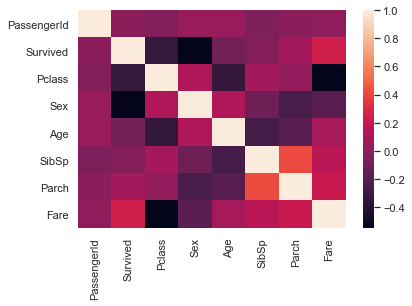

In [62]:
# Write code here
#titanic_df.head()

ax = sns.heatmap(titanic_df.corr())
plt.show()



# Q 12.(.5) What are your observation from this heatmap.

As expected, there is a clear correlation between Sex and survived.  

 

Note that correlation  measures **linear relationships** and is defined for numeric attributes. Also, be careful that
there need not the a linear relationship between variables(Survived vs any other attributes).

For categorical variable, we need to use a different measure of association.

- [Cramér's V, measure of association between two nominal variables](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

It is based on a nominal variation of Pearson’s Chi-Square Test.

Let's use this implementation from stack overflow
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792. It shows usage for **tips** dataset from seaborn.

Let's copy paste this here

In [111]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

Let's work with  titanic dataset again


# Q 13(.5 points) Copy titanic_df into titanic_df_small  Dataframe.  Only select record with Title value = *Master., Miss., Mr. or Mrs.*     into titanic_df_small.

You can check other title doesn't have enough record, hence ignoring them from our analysis.

In [124]:
# Write code here
titanic_df_small = titanic_df[titanic_df['Title'].isin(['Master.','Miss.','Mr.','Mrs.'])].copy()
#titanic_df_small = titanic_df.loc[(titanic_df.Title == 'Master.') | (titanic_df.Title == 'Miss.') | (titanic_df.Title == 'Mr.') | (titanic_df.Title == 'Mrs.')]
titanic_df_small.sample(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",0,43.0,0,1,24160,211.3375,B3,S,B,Mrs.
438,439,0,1,"Fortune, Mr. Mark",1,64.0,1,4,19950,263.0000,C23 C25 C27,S,C,Mr.
492,493,0,1,"Molson, Mr. Harry Markland",1,55.0,0,0,113787,30.5000,C30,S,C,Mr.


# Q 14 (.5 points) Using pandas cross tabulate *Survived* and *Title* in titanic_df_small. Also compute cramers_v for association between *Survived* and *Title*.

In [144]:
# Write code here
sur_tit = pd.crosstab(  titanic_df_small['Title'], titanic_df_small['Survived'],dropna=True)

sur_tit

Survived,0,1
Title,,
Master.,17,23
Miss.,54,125
Mr.,436,82
Mrs.,27,101


In [135]:
cramers_v(sur_tit)

0.5678845414861878

# Q 15(.5 points) Using sklearn library, Label encode *Title* in titanic_df_small into a new column called *Encoded_title*

In [138]:
# Write code here
le = preprocessing.LabelEncoder()
le.fit(titanic_df_small['Title'])
titanic_df_small['Encoded_title'] = le.transform(titanic_df_small['Title'])
titanic_df_small.sample(6)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title,Encoded_title
391,392,1,3,"Jansson, Mr. Carl Olof",1,21.0,0,0,350034,7.7958,O,S,O,Mr.,2
789,790,0,1,"Guggenheim, Mr. Benjamin",1,46.0,0,0,PC 17593,79.2000,B82 B84,C,B,Mr.,2
155,156,0,1,"Williams, Mr. Charles Duane",1,51.0,0,1,PC 17597,61.3792,O,C,O,Mr.,2
548,549,0,3,"Goldsmith, Mr. Frank John",1,33.0,1,1,363291,20.5250,O,S,O,Mr.,2
835,836,1,1,"Compton, Miss. Sara Rebecca",0,39.0,1,1,PC 17756,83.1583,E49,C,E,Miss.,1
390,391,1,1,"Carter, Mr. William Ernest",1,36.0,1,2,113760,120.0000,B96 B98,S,B,Mr.,2


# Q 16(.5 points) Calculate correlation coefficients between *Survived* and *Encoded_title*.

In [143]:
# Write code here
#np.corrcoef(titanic_df_small['Encoded_title'].astype("category"), titanic_df_small['Survived'].astype("category") )
test = pd.crosstab(titanic_df_small['Survived'] , titanic_df_small['Encoded_title'])
print(np.corrcoef(test))

titanic_df_small['Survived'].corr(titanic_df_small['Encoded_title'])



[[1.         0.05417365]
 [0.05417365 1.        ]]


-0.06573945841187467

# Q 17. (.5 points) Whats is your observation between using cramer_v and correlation coefficients for  *Survived* and *Encoded_title/Title*.

Unfortunately it is likley I have an error in either the correlation coefficient or the cramers v.  They both are a measurement of association.  But these measurements are pretty different and Prof. Parada mentioned that they should be faily close.  I am unable to make them close unfortunately.  Should we be creating our own cramers v function instead?  I tried, but still the measurements differe fairly significantly.  A lot of the other correlation measurements outside of pandas show similar results to pandas.  It may be the cramers v calculation.  

My observations will remain that it was not a good time to be a Mr. on the Titanic.  



In [160]:
import scipy.stats as stats
sur_tit = pd.crosstab(   titanic_df_small['Survived'],titanic_df_small['Encoded_title'],dropna=True)
X2 = stats.chi2_contingency(sur_tit, correction=False)[0]
n = np.sum(sur_tit).sum()
minDim = min(sur_tit.shape)-1
V = np.sqrt((X2/n) / minDim)
print(V)
sur_tit


0.5706065361218078


Encoded_title,0,1,2,3
Survived,,,,
0,17,54,436,27
1,23,125,82,101


In [161]:
from numpy import cov
cov(titanic_df_small['Survived'], titanic_df_small['Encoded_title'])
from scipy.stats import pearsonr
pearsonr(titanic_df_small['Survived'], titanic_df_small['Encoded_title'])

(-0.06573945841187483, 0.05326692520428533)

In [162]:
from scipy.stats import spearmanr
spearmanr(titanic_df_small['Survived'], titanic_df_small['Encoded_title'])

SpearmanrResult(correlation=-0.06947821050887071, pvalue=0.04105939439179508)